$Step-1$:

**Import packages**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt

$Step-2$:

**About the dataset**

Here we use a dataset name : CIFAR

It containes 60000 images and 10 classes

Each class containes 6000 images

Data set is divided into two parts training images: 50,000

testing images: 10,000

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 513s 3us/step


In [3]:
train_images.shape

# 50000 images
# 32 is width
# 32 is height
# 3 RGB : these are colour images

(50000, 32, 32, 3)

In [4]:
32*32*3

3072

In [5]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

$Step-3$:

**Draw the images**

In [6]:
# Take the class labels first
train_labels   # list in list

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
len(datasets.cifar10.load_data())

2

In [8]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
len(class_names)

10

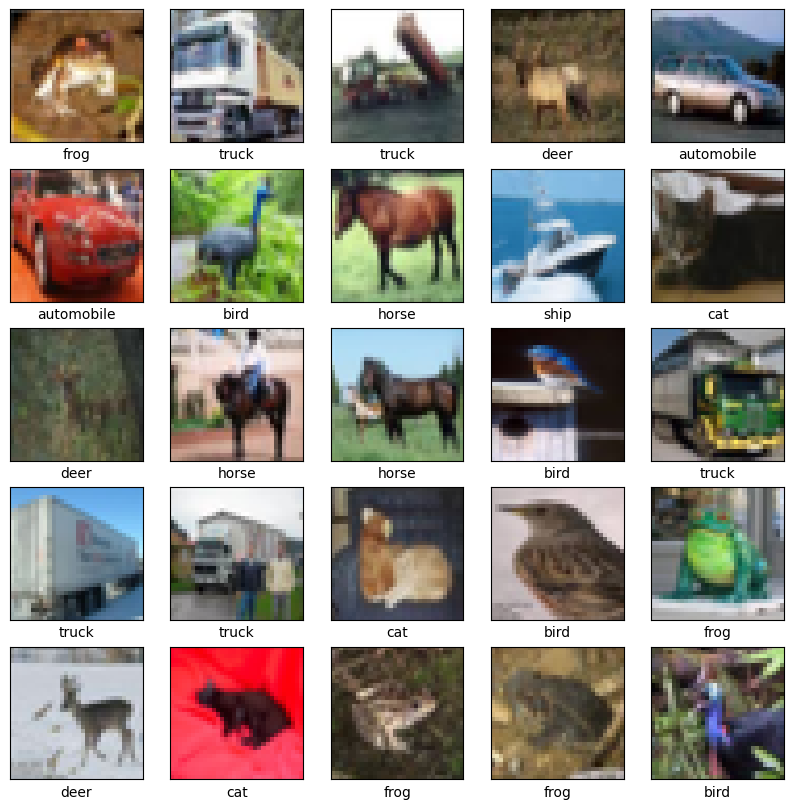

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

$Step-4$

**Create the CNN network**

- Convolution

- Activation

- Striding (default =1) (not necessary to provide

- Padding (not necessary to provide)

- pooling

In [10]:
#model=models.Sequential()
#model.add(layers.Conv2D())

# filter is your weight    3*3*3 : 27*32=864

In [11]:
model=models.Sequential()

#############################################################################################
model.add(layers.Conv2D(32, # filters
                        (3,3), # filter size/kernal size
                        activation='relu',
                        input_shape=(32,32,3)
                        ))  # Stride / padding : default

model.add(layers.MaxPool2D((2,2)))  # shape of the pool

###############################################################################################
model.add(layers.Conv2D(64, # filters
                        (3,3), # filter size/kernal size
                        activation='relu'))  # stride /padding: deafault

model.add(layers.MaxPool2D((2,2)))

###############################################################################################

model.add(layers.Conv2D(64, # filters
                        (3,3), # filter size/kernal size
                        activation='relu'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

$Step-5$:

**Add dense layers**

In [13]:
model.add(layers.Flatten()) # After convolution ==== Fully connect layer
model.add(layers.Dense(64,activation='relu'))  # Hidden layer 64 neurons, relu activation function
model.add(layers.Dense(10)) # 10 classes so 10 neurons

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

$Step-6$:

**Compile the model**

In [15]:
model.compile(optimizer='adam', #optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss
              metrics=['accuracy']# metric
              )

history=model.fit(train_images,train_labels, epochs=10,
                  validation_data=(test_images,test_labels))

# 1 epoch= one forward pass + one backward pass

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.8662 - accuracy: 0.3732 - val_loss: 1.4894 - val_accuracy: 0.4727
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.3474 - accuracy: 0.5148 - val_loss: 1.2519 - val_accuracy: 0.5496
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1900 - accuracy: 0.5785 - val_loss: 1.1429 - val_accuracy: 0.5972
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0901 - accuracy: 0.6190 - val_loss: 1.1488 - val_accuracy: 0.6031
Epoch 5/10
1563/1563 [==============================] - 290s 186ms/step - loss: 1.0100 - accuracy: 0.6485 - val_loss: 1.0423 - val_accuracy: 0.6439
Epoch 6/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9276 - accuracy: 0.6762 - val_loss: 1.1016 - val_accuracy: 0.6297
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8713 - accuracy: 0.6978 - val_loss: 1.0006

In [16]:
history.history

{'loss': [1.8661748170852661,
  1.3474481105804443,
  1.1899694204330444,
  1.090050220489502,
  1.0099860429763794,
  0.9276242256164551,
  0.8712548613548279,
  0.816261887550354,
  0.7663664817810059,
  0.7293382883071899],
 'accuracy': [0.37323999404907227,
  0.5147600173950195,
  0.578540027141571,
  0.6189799904823303,
  0.6485199928283691,
  0.6762199997901917,
  0.6977599859237671,
  0.7156000137329102,
  0.7343599796295166,
  0.7459999918937683],
 'val_loss': [1.4893999099731445,
  1.251936912536621,
  1.1428571939468384,
  1.1488399505615234,
  1.042304515838623,
  1.1015551090240479,
  1.000597596168518,
  1.0729162693023682,
  1.0912542343139648,
  1.1136436462402344],
 'val_accuracy': [0.47269999980926514,
  0.5496000051498413,
  0.5971999764442444,
  0.6031000018119812,
  0.6438999772071838,
  0.6297000050544739,
  0.6632999777793884,
  0.6477000117301941,
  0.6514000296592712,
  0.642300009727478]}

313/313 - 3s - loss: 1.1136 - accuracy: 0.6423 - 3s/epoch - 9ms/step


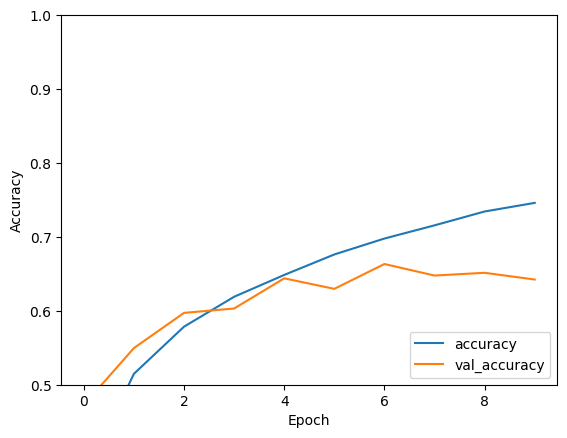

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [18]:
#Sir what about normalization in this dataset?
# scale down the values
# scale up or scale down result will not change
# it is only speed up the process

In [19]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-1.52636096e-02, -1.29847035e-01, -8.99128392e-02,
           -7.17586130e-02, -1.92397401e-01,  1.09552816e-01,
           -2.50963360e-01, -2.74457615e-02,  9.61930975e-02,
           -2.11839780e-01, -8.85825977e-03, -5.15757687e-02,
           -1.86546490e-01,  8.22294280e-02,  4.04320545e-02,
            3.50369215e-02, -1.41092822e-01,  6.24471121e-02,
           -2.02522680e-01,  9.48275626e-03,  4.14358377e-02,
            8.19553509e-02, -1.77216038e-01,  1.72435865e-01,
            8.63563549e-03, -8.70916620e-02, -3.11151240e-02,
            7.20464974e-04, -1.08063623e-01, -9.60171521e-02,
            1.31145090e-01, -2.57462084e-01],
          [-7.59508088e-02,  9.81738195e-02,  4.80698869e-02,
            1.16867982e-02, -1.28148332e-01,  1.84041843e-01,
           -2.72963762e-01,  9.25694555e-02,  2.13756114e-02,
           -2.56651580e-01, -8.86600688e-02, -7.95386732e-02,
           -

In [20]:
test_labels.flatten()

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [21]:
import numpy as np
import pandas as pd

y_pred = model.predict(test_images)
max_prob=[np.max(i)  for i in y_pred]
index=[np.argmax(i) for i in y_pred]
prediction_class=[class_names[i] for i in index]
Ground_Truth_class=[class_names[i] for i in test_labels.flatten()]

d1=pd.DataFrame(zip(max_prob,index,prediction_class,Ground_Truth_class),
             columns=['Max_proba','Index','Prediction_class','Ground_Truth_class'])
con=d1['Prediction_class']==d1['Ground_Truth_class']
d1['output']=np.where(con,1,0)
accuracy=d1['output'].sum()/len(d1['output'])
accuracy

313/313 [==============================] - 3s 9ms/step


0.6423

In [22]:
d1

,Max_proba,Index,Prediction_class,Ground_Truth_class,output
0,6.918844,8,ship,cat,0
1,23.030729,8,ship,ship,1
2,11.106849,8,ship,ship,1
3,13.486443,0,airplane,airplane,1
4,10.174416,6,frog,frog,1
...,...,...,...,...,...
9995,5.660662,3,cat,ship,0
9996,5.202196,6,frog,cat,0
9997,6.373821,5,dog,dog,1
9998,8.127434,0,airplane,automobile,0


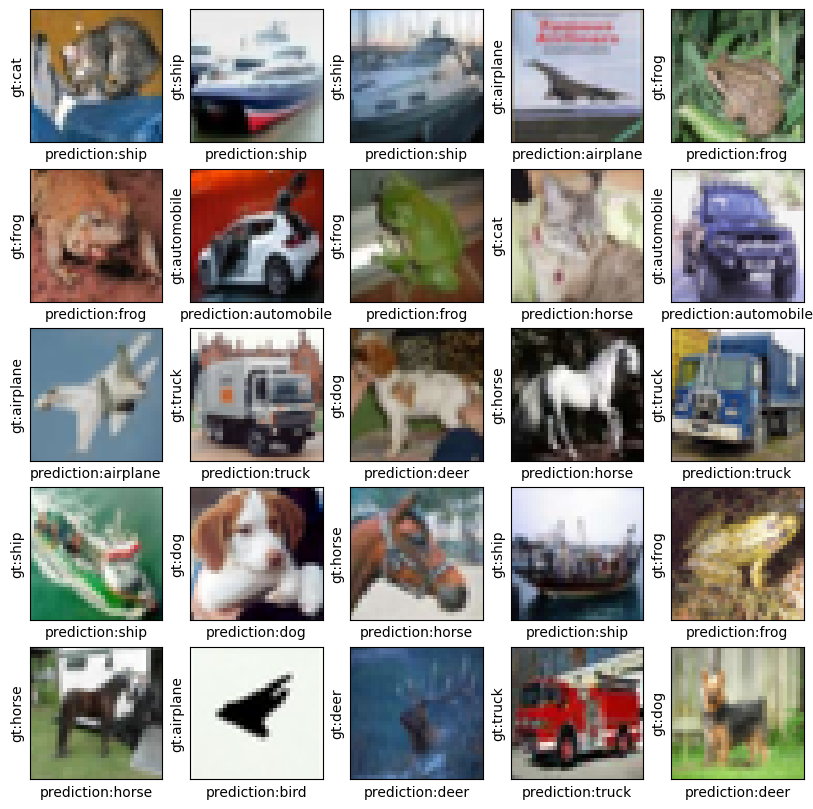

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f'prediction:{class_names[np.argmax(y_pred[i])]}')
    plt.ylabel(f'gt:{class_names[test_labels.flatten()[i]]}')
plt.show()